<div style="background:#FFFFFF">
<img src="logo.jpg", width=150, ALIGN="left", border=2 style='margin-right:10px;'>
<h1>Starting Kit - Bee vs Wasp </h1>
<p>
This starting kit will guide you step by step and will walk you through the data statistics and<br>
examples. This will give you a clear idea of what this challenge is about and how you can<br>
proceed further to solve the challenge.
</p>

<br><br>   
This code was tested with Python 3.8.5 |Anaconda custom (64-bit)| (default, Dec 23 2020, 21:19:02) (https://anaconda.org/)<br>

<p>
ALL INFORMATION, SOFTWARE, DOCUMENTATION, AND DATA ARE PROVIDED "AS-IS". The CHALEARN, AND/OR OTHER ORGANIZERS OR CODE AUTHORS DISCLAIM ANY EXPRESSED OR IMPLIED WARRANTIES, INCLUDING, BUT NOT LIMITED TO, THE IMPLIED WARRANTIES OF MERCHANTABILITY AND FITNESS FOR ANY PARTICULAR PURPOSE, AND THE WARRANTY OF NON-INFRIGEMENT OF ANY THIRD PARTY'S INTELLECTUAL PROPERTY RIGHTS. IN NO EVENT SHALL AUTHORS AND ORGANIZERS BE LIABLE FOR ANY SPECIAL, 
INDIRECT OR CONSEQUENTIAL DAMAGES OR ANY DAMAGES WHATSOEVER ARISING OUT OF OR IN CONNECTION WITH THE USE OR PERFORMANCE OF SOFTWARE, DOCUMENTS, MATERIALS, PUBLICATIONS, OR INFORMATION MADE AVAILABLE FOR THE CHALLENGE. 
</p>

<hr style='background-color: #D3D3D3; height: 1px; border: 0;'>
    This challenge was organized by <b>Team Ecologists</b> of <b><a style='color:#4D6605;' href='http://www.chalearn.org/'>ChaLearn</a></b>  at <b><a style='color: #62023C;' href='https://www.universite-paris-saclay.fr/'>Université Paris Saclay</a></b>

</div>

<hr style='background-color: #D3D3D3; height: 1px; border: 0;'>

<div style="background:#FFFFFF">
<h2>Introduction </h2>
<span style='color:red;'>This is the first verstion of the starting kit. We are processing and changing the data from time to time so we will update this notebook regularly</span>

This challenge uses a combination of two datasets
<ol>
    <li>Bee vs wasp dataset from <b>Kaggle</b></li>
    <li>Dataset from <b>MUSÉUM NATIONAL D’HISTOIRE NATURELLE</b></li>
</ol>

The <span style='color:red;'>combined</span> dataset coniststs of total <b>8,498</b> images and each image belongs to one of the following classes
<ol>
    <li>Bee</li>
    <li>Wasp</li>
    <li>Other insect</li>
    <li>Butterfly insect</li>  
    <li>Other</li>
</ol>
<span style='color:red;'>In this version of notebook only bees and wasps are used. All other classes will be included in next versions</span>
    
This challenge is about creating a Machine Learning model and train it with the data provided to classify the images into the mentioned 5 categories.


References and credits:
<ul>
    <b>
    <li><a style='color:#1DBEFF;' href='https://www.kaggle.com/jerzydziewierz/bee-vs-wasp'>George Rey (Kaggle)</a></li>
    <li><a style='color:#000000;' href='https://www.mnhn.fr/'>MUSÉUM NATIONAL D’HISTOIRE NATURELLE</a></li>
    <li><a style='color:#CC0333;' href='https://www.spipoll.org/'>SPIPOLL</a></li>
    <li><a style='color: #62023C;' href='https://www.universite-paris-saclay.fr/'>Université Paris Saclay</a></li>
    <li><a style='color:#4D6605;' href='http://www.chalearn.org/'>ChaLearn</a></li>
    </b>
</ul>


In [1]:
model_dir = 'sample_code_submission/' # Change the model to a better one once you have one!
result_dir = 'sample_result_submission/' 
problem_dir = 'ingestion_program/'  
score_dir = 'scoring_program/'
from sys import path; path.append(model_dir); path.append(problem_dir); path.append(score_dir); 
%matplotlib inline
# Uncomment the next lines to auto-reload libraries (this causes some problem with pickles in Python 3)
%load_ext autoreload
%autoreload 2
import seaborn as sns; sns.set()
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
%reload_ext autoreload

***
# Step 1: Exploratory data analysis
We provide sample_data with the starting kit, but to prepare your submission, you must fetch the public_data from the challenge website and point to it.

In [3]:
data_dir = 'public_data' # Change this to the directory where you put the input data 
data_dir = 'D:/Dataset/Museum/Extract/AutoML/public_data'
data_name = 'bee'
!ls $data_dir*

'ls' n’est pas reconnu en tant que commande interne
ou externe, un programme exécutable ou un fichier de commandes.


For convenience, we load the data as a "pandas" data frame, so we can use "pandas" and "seaborn" built in functions to explore the data.

In [4]:
from data_io import read_as_df
data = read_as_df(data_dir  + '/' + data_name) # The data are loaded as a Pandas Data Frame

Reading D:/Dataset/Museum/Extract/AutoML/public_data/bee_train from AutoML format
Number of examples = 6799
Number of features = 12288
  Class
0  Bees
1  wasp
Number of classes = 2


In [5]:
data.head()

,pixel_1_1_R,pixel_1_1_G,pixel_1_1_B,pixel_1_2_R,pixel_1_2_G,pixel_1_2_B,pixel_1_3_R,pixel_1_3_G,pixel_1_3_B,pixel_1_4_R,...,pixel_64_62_R,pixel_64_62_G,pixel_64_62_B,pixel_64_63_R,pixel_64_63_G,pixel_64_63_B,pixel_64_64_R,pixel_64_64_G,pixel_64_64_B,target
0,63,88,3,61,86,1,54,86,0,55,...,110,148,72,124,150,89,129,134,91,Bees
1,157,181,107,158,197,85,131,175,41,105,...,163,151,176,125,120,111,160,154,154,Bees
2,148,177,93,161,188,107,173,194,128,161,...,171,173,173,133,141,137,96,110,90,Bees
3,38,60,10,38,60,11,38,60,11,40,...,83,95,35,87,95,37,79,91,37,Bees
4,223,220,36,224,217,26,224,219,24,224,...,134,152,120,124,144,113,128,150,124,Bees


In [6]:
data.describe() 

,pixel_1_1_R,pixel_1_1_G,pixel_1_1_B,pixel_1_2_R,pixel_1_2_G,pixel_1_2_B,pixel_1_3_R,pixel_1_3_G,pixel_1_3_B,pixel_1_4_R,...,pixel_64_61_B,pixel_64_62_R,pixel_64_62_G,pixel_64_62_B,pixel_64_63_R,pixel_64_63_G,pixel_64_63_B,pixel_64_64_R,pixel_64_64_G,pixel_64_64_B
count,6799.000000,6799.000000,6799.000000,6799.000000,6799.000000,6799.000000,6799.000000,6799.000000,6799.000000,6799.000000,...,6799.000000,6799.000000,6799.000000,6799.000000,6799.000000,6799.000000,6799.000000,6799.000000,6799.000000,6799.00000
mean,125.826886,125.506398,85.928078,126.269746,125.974408,86.250772,126.694220,126.306074,86.561406,126.888366,...,85.114282,127.107516,125.468745,85.127519,126.567289,125.058832,84.628328,126.012649,124.680394,84.17179
std,63.595586,57.467779,66.597885,63.773565,57.624659,66.736610,63.804503,57.625438,66.854780,63.736578,...,66.896494,63.883341,57.282239,66.702353,63.712993,57.058546,66.383316,63.934979,57.215452,66.40453
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,76.000000,82.000000,32.000000,76.000000,83.000000,32.000000,76.500000,83.000000,32.500000,76.500000,...,31.000000,76.500000,83.000000,31.000000,76.000000,82.000000,31.000000,76.000000,82.000000,30.00000
50%,122.000000,126.000000,71.000000,122.000000,125.000000,70.000000,122.000000,126.000000,70.000000,123.000000,...,69.000000,123.000000,126.000000,70.000000,123.000000,125.000000,69.000000,122.000000,124.000000,68.00000
75%,173.000000,168.000000,127.000000,174.000000,168.000000,127.000000,175.000000,169.000000,129.000000,175.000000,...,127.000000,174.000000,166.000000,126.000000,173.000000,165.000000,124.000000,174.000000,166.000000,124.00000
max,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,...,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.00000


**Distribution of Classes/Labels**

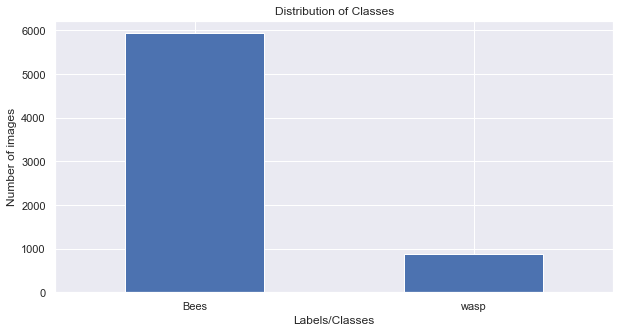

In [7]:
import matplotlib.pyplot as plt

data.iloc[:, -1:].target.value_counts().plot(kind='bar', figsize=(10, 5), rot=0)
plt.xlabel("Labels/Classes")
plt.ylabel("Number of images")
plt.title("Distribution of Classes");

### Visualization

**Visualizing the 6 images to get an overview of the images**

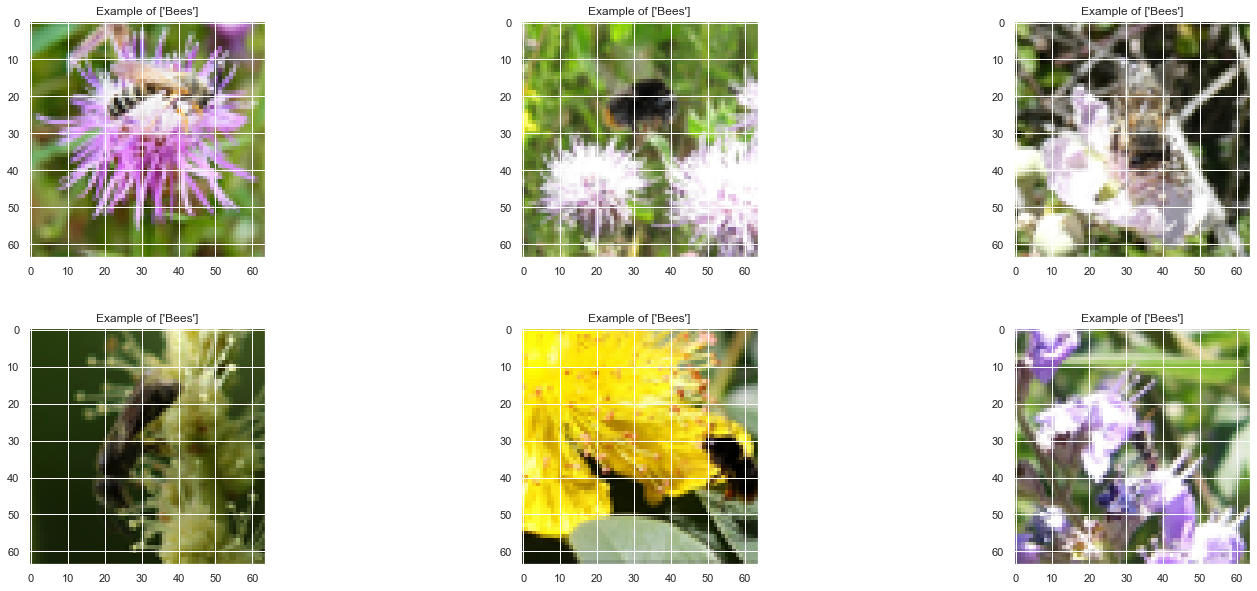

In [8]:
%matplotlib inline
import matplotlib.image as mpimg


num_toshow = 6
fig, _axs = plt.subplots(nrows=2, ncols=3, figsize=(25,10))
fig.subplots_adjust(hspace=0.3)
axs = _axs.flatten()

for i in range(num_toshow):
    img = data.iloc[i].values[:-1].reshape(64,64,3)
    label = data.iloc[i].values[-1:]
    axs[i].set_title('Example of {}'.format(label))
    axs[i].imshow(img.astype(float) / 255)

plt.show()

**Visualizing the mean image from each class**

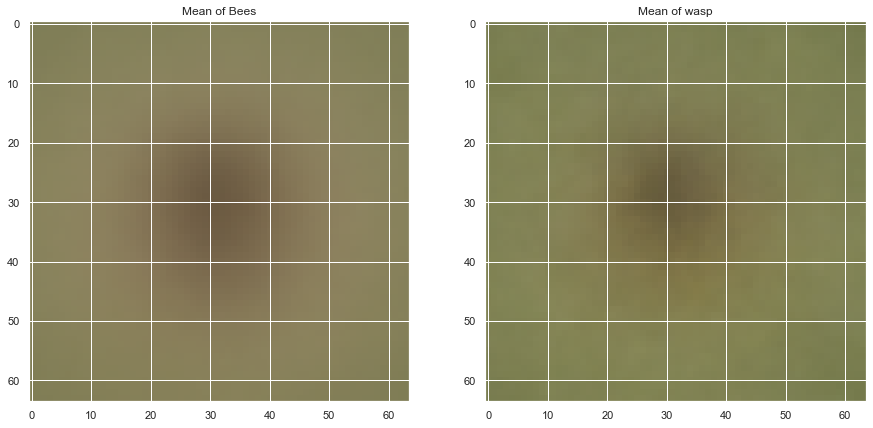

In [9]:
import numpy as np

mean_label = []
for label in data['target'].unique():
    mean_label.append(
        (label, np.mean(data[data["target"]==label])) # Save the mean of features of images with a specific label
    )
num_toshow = len(mean_label)
fig, _axs = plt.subplots(nrows=1, ncols=2, figsize=(15,8))
fig.subplots_adjust(hspace=0.3)
axs = _axs.flatten()

for i in range(num_toshow): # Print those images
    label, raw_data = mean_label[i]
    img = raw_data.values.reshape(64,64,3)
    axs[i].set_title('Mean of {}'.format(label))
    axs[i].imshow(img.astype(float) / 255)

plt.show()

**Visulizing mean of RGB component of each class**

[]

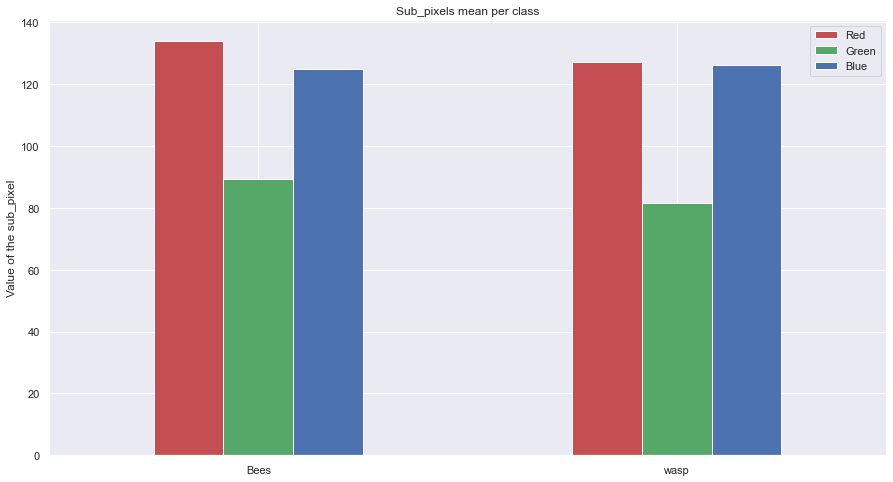

In [10]:
import pandas as pd

column_red = []
column_green = []
column_blue = []
for i in range(64*64):
    column_red.append(f'pixel_{int(i/64)+1}_{(i%64)+1}_R') # Save the features names according to the red color
    column_green.append(f'pixel_{int(i/64)+1}_{(i%64)+1}_G') # Save the features names according to the green color
    column_blue.append(f'pixel_{int(i/64)+1}_{(i%64)+1}_B') # Save the features names according to the blue color

labels = []
means = []
for label in data['target'].unique():
    sub_data_label = data[data['target'] == label] 
    sub_data_label_red = sub_data_label[column_red] # Keep all red features
    sub_data_label_green = sub_data_label[column_green] # Keep all green features
    sub_data_label_blue = sub_data_label[column_blue] # Keep all blue features
    labels.append(label) # Save the label of images
    means.append([np.mean(np.mean(sub_data_label_red)),
               np.mean(np.mean(sub_data_label_blue)),
               np.mean(np.mean(sub_data_label_green))]) # Save the mean of RGB for each class

test = pd.DataFrame(index=labels, data=means, columns=(['Red','Green','Blue'])) # Save results in a Dataframe

test.plot(kind="bar", color=['r','g','b'], title='Sub_pixels mean per class', figsize=(15,8))
plt.ylabel('Value of the sub_pixel')
plt.xticks(rotation=0)
plt.plot()

***
# Step 2: Building a predictive model
We reload the data with the AutoML DataManager class because this is more convenient:

## Loading data with DataManager
We reload the data with the AutoML DataManager class because this is more convenient:

In [11]:
from data_manager import DataManager
D = DataManager(data_name, data_dir, replace_missing=True)
print(D)

Info file found : D:\Dataset\Museum\Extract\AutoML\public_data\bee_public.info
DataManager : bee
info:
	usage = beeVSwasp
	name = bee
	task = multiclass.classification
	target_type = Numerical
	feat_type = Numerical
	metric = balanced_accuracy_score
	feat_num = 12288
	target_num = 2
	label_num = 2
	train_num = 6799
	valid_num = 849
	test_num = 850
	has_categorical = 0
	has_missing = 0
	is_sparse = 0
	time_budget = 500
	format = dense
data:
	X_train = array(6799, 12288)
	Y_train = array(6799, 1)
	X_valid = array(849, 12288)
	Y_valid = array(849, 1)
	X_test = array(850, 12288)
	Y_test = array(850, 1)
feat_type:	array(12288,)
feat_idx:	array(0,)



## Training a predictive model
We provide an example of predictive model in the `sample_code_submission/` directory. 
You can change this model and use a better one to get a good score for the challenge


In [12]:
from data_io import write
from model import model

<div style="background:#FFF">
an instance of the model (run the constructor) and attempt to reload a previously saved version from `sample_code_submission/`:
</div>

In [13]:
myModel = model()
trained_model_name = model_dir + data_name
# Uncomment the next line to re-load an already trained model
#myModel = myModel.load(trained_model_name) 

<div style="background:#FFF">
    Train the model (unless you reloaded a trained model) and make predictions. 
</div>

In [14]:
if not(myModel.is_trained):
    X_train = D.data['X_train']
    Y_train = D.data['Y_train']
    myModel.fit(X_train, Y_train)                     

Y_hat_train = myModel.predict(D.data['X_train']) # Optional, not really needed to test on taining examples
Y_hat_valid = myModel.predict(D.data['X_valid'])
Y_hat_test = myModel.predict(D.data['X_test'])

FIT: dim(X)= [6799, 12288]
FIT: dim(y)= [6799, 1]
Epoch 1/10
55/55 [==============================] - 8s 142ms/step - loss: 0.1579 - accuracy: 0.4995 - val_loss: 0.5822 - val_accuracy: 0.6257
Epoch 2/10
55/55 [==============================] - 7s 135ms/step - loss: 0.1447 - accuracy: 0.5825 - val_loss: 0.4209 - val_accuracy: 0.8000
Epoch 3/10
55/55 [==============================] - 7s 133ms/step - loss: 0.1279 - accuracy: 0.6838 - val_loss: 0.4433 - val_accuracy: 0.8015
Epoch 4/10
55/55 [==============================] - 8s 145ms/step - loss: 0.1135 - accuracy: 0.7700 - val_loss: 0.4432 - val_accuracy: 0.7941
Epoch 5/10
55/55 [==============================] - 9s 162ms/step - loss: 0.1085 - accuracy: 0.7658 - val_loss: 0.6193 - val_accuracy: 0.6963
Epoch 6/10
55/55 [==============================] - 9s 158ms/step - loss: 0.1031 - accuracy: 0.7836 - val_loss: 0.6889 - val_accuracy: 0.6588
Epoch 7/10
55/55 [==============================] - 8s 138ms/step - loss: 0.1010 - accuracy: 0.792

**Save the trained model** (will be ready to reload next time around) and save the prediction results. <br>
**IMPORTANT:** if you save the trained model, it will be bundled with your sample code submission. Therefore your model will NOT be retrained on the challenge platform. Remove the pickle from the submission if you want the model to be retrained on the platform.

In [15]:
#myModel.save(trained_model_name)                 
result_name = result_dir + data_name
from data_io import write
write(result_name + '_train.predict', Y_hat_train)
write(result_name + '_valid.predict', Y_hat_valid)
write(result_name + '_test.predict', Y_hat_test)
!ls $result_name*

'ls' n’est pas reconnu en tant que commande interne
ou externe, un programme exécutable ou un fichier de commandes.


## Scoring the results
### Load the challenge metric

**The metric chosen for your challenge** is identified in the "metric.txt" file found in the `scoring_program/` directory.
<br> 
The function "get_metric" searches first for a metric having that name in my_metric.py, then in libscores.py, then in sklearn.metric.


In [16]:
from libscores import get_metric
metric_name, scoring_function = get_metric()
print('Using scoring metric:', metric_name)
# Uncomment the next line to display the code of the scoring metric
#??scoring_function

Using scoring metric: balanced_accuracy_score


## Training performance

In [17]:
print('Training score for the', metric_name, 'metric = %5.4f' % scoring_function(Y_train, Y_hat_train))
print('Ideal score for the', metric_name, 'metric = %5.4f' % scoring_function(Y_train, Y_train))
if len(D.data['Y_valid']) > 0 and len(D.data['Y_test']) > 0:
    print('Valid score for the', metric_name, 'metric = %5.4f' % scoring_function(D.data['Y_valid'], Y_hat_valid))
    print('Test score for the', metric_name, 'metric = %5.4f' % scoring_function(D.data['Y_test'], Y_hat_test))

Training score for the balanced_accuracy_score metric = 0.8770
Ideal score for the balanced_accuracy_score metric = 1.0000
Valid score for the balanced_accuracy_score metric = 0.8313
Test score for the balanced_accuracy_score metric = 0.8134


You can add here other scores and result visualization.

## Confusion matrix

In [18]:
from sklearn.metrics import confusion_matrix
confustion_matrix = confusion_matrix(Y_train, Y_hat_train)
confustion_matrix

array([[5218,  706],
       [ 111,  764]], dtype=int64)

## Cross-validation performance

CV scores on sample_data doesn't have enough data, and so isn't meaningful.
Run it with the full data to see meaningful values.

In [20]:
from sklearn.metrics import make_scorer
from sklearn.model_selection import cross_val_score
scores = cross_val_score(myModel, X_train, Y_train, cv=3, scoring=make_scorer(scoring_function))
print('\nCV score (95 perc. CI): %0.2f (+/- %0.2f)' % (scores.mean(), scores.std() * 2))

FIT: dim(X)= [4532, 12288]
FIT: dim(y)= [4532, 1]
Epoch 1/10
37/37 [==============================] - 6s 154ms/step - loss: 0.1680 - accuracy: 0.3263 - val_loss: 0.4064 - val_accuracy: 0.8666
Epoch 2/10
37/37 [==============================] - 5s 141ms/step - loss: 0.1619 - accuracy: 0.4447 - val_loss: 0.5123 - val_accuracy: 0.8512
Epoch 3/10
37/37 [==============================] - 5s 139ms/step - loss: 0.1556 - accuracy: 0.5597 - val_loss: 0.5994 - val_accuracy: 0.6516
Epoch 4/10
11/37 [=======>......................] - ETA: 3s - loss: 0.1392 - accuracy: 0.6273

KeyboardInterrupt: 

***
# Step 3: Making a submission

## Unit testing

It is <b><span style="color:red">important that you test your submission files before submitting them</span></b>. All you have to do to make a submission is modify the file <code>model.py</code> in the <code>sample_code_submission/</code> directory, then run this test to make sure everything works fine. This is the actual program that will be run on the server to test your submission. 
<br>
Keep the sample code simple.<br>

<code>python3</code> is required for this step

In [ ]:
!source activate python3; python $problem_dir/ingestion.py $data_dir $result_dir $problem_dir $model_dir

### Test scoring program

In [ ]:
scoring_output_dir = 'scoring_output'
!source activate python3; python $score_dir/score.py $data_dir $result_dir $scoring_output_dir

# Prepare the submission

In [ ]:
import datetime 
from data_io import zipdir
the_date = datetime.datetime.now().strftime("%y-%m-%d-%H-%M")
sample_code_submission = '../sample_code_submission_' + the_date + '.zip'
sample_result_submission = '../sample_result_submission_' + the_date + '.zip'
zipdir(sample_code_submission, model_dir)
zipdir(sample_result_submission, result_dir)
print("Submit one of these files:\n" + sample_code_submission + "\n" + sample_result_submission)